# Learning Curves
In this project we are trying to find the best model for our algorithm, and avoid underfitting or overfitting. The example that we consider here is a nonlinear regression model. Unlike previous projects, we attempt to take advantage of the scikit-learn library. We know that the complexity of the model is a function of the degree of the polynomial we choose. We would like to find the least complex model that achieves the minimum test error.

For this purpose, we set aside part of our data as validation ("val") data and the rest as training data ("train"). We run our algorthm with different subsets of training data instances, starting from just one instance, until we use all of our 100 training instances.

 If we get a figure similar to the one here, where the training MSE (blue jagged line) may improve, but the validation error (red jagged line) never approaches the allowed (green line) level, then we know this is a high variance case (so, we are overfitting the training data). To mitigate this problem we need to increase the number of training data instances or reduce the model complexity to reduce the variance.  

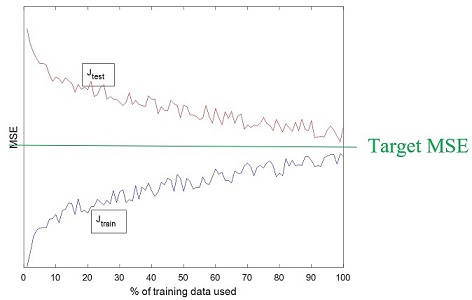

 Alternatively, if we get a figure similar to the one below, where both the training MSE (blue) and the validation MSE (red) remain well above the allowed error level (green) even when when increase the number of training instances, then we are underfitting. In this high bias case, increasing the number of training instances does not help; even as we maximize the number of training instances used, both the training and validation MSE stay above the allowed error range.
 To mitigate this underfitting problem, we need to use a more complex model, for example by increasing the degree of the polynimial of our model.

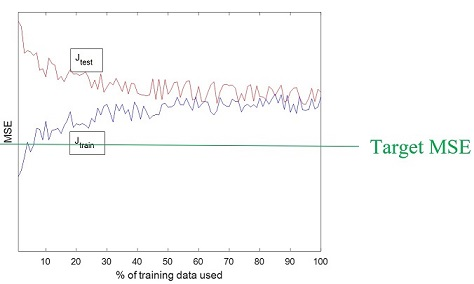

The purpose of this project is to learn to determine if our model is high bias (underfitting) or high variance (overfitting), and decide which is the least complex model that mitigates both problems.

***
***

# Assumptions
*   Assume that target MSE error we are aiming is $\epsilon = 1$.
*   The MSE errors displayed on the vertical axis of the graphs below can go from very small values (like $10^{-3}$) to very large (like $10^{3}$), so all of the graphs are semilog. This means that each major tick mark is ten times bigger than the previous major tick mark. If you notice, along the vertical axis, the values for each line are $0.001$, then $0.1$, then $1$, then $10$, and finally $100$($\ddagger$).

($\ddagger$) If we did not use semilog graphs, then all the lines would appear to be at or very near $0$  training set size of $5$.

# Problem 1 [2 points]
 Given the code provided below and the plots provided:
  explain:
> a) What problem does the plot with degree 1 present?

> b) What steps can we take to mitigate the problem described in (a)?  

 # Problem 2 [1 point]
 Given the code provided below and the plots provided:
  explain:

> a) What problem does the plot with degree 15 present?


> b) What can we do to mitigate this problem?


# Problem 3 [2 points]
Given the explanation provided above, and the graphs presented by the code below, select which degree of polynomial you would use for this data, and justify your answer.

Recall that we would like to find the least complex model that achieves the minimum test error.

**To begin, run the following code to generate the graphs. Note that this code includes using functions from the library scikit-learn, which save us a lot of time and coding. We strongly encourage you to familiarize yourselves with the fucntions offered by this library.**

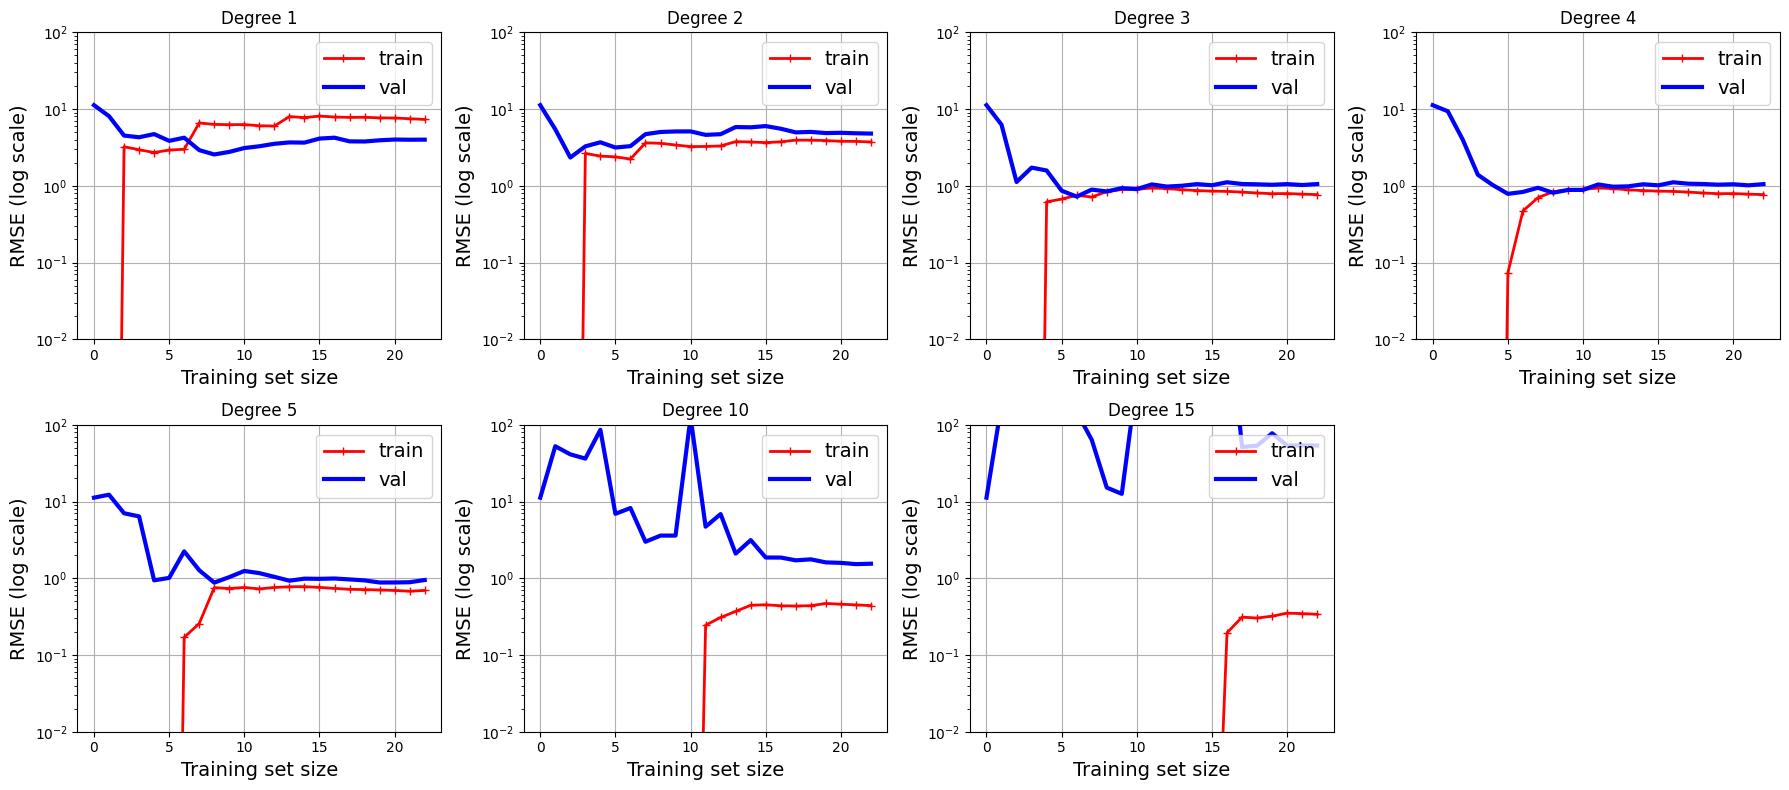

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to generate synthetic data. A function is an excerpt of code that can be invoked (called) from the main program.
def generate_data(size, noise_level=0.1):
    np.random.seed(42)
    X = np.random.uniform(-3, 3, size)
    y = X - 2 * (X ** 2) + X ** 3 + np.random.normal(0, noise_level, size)
    X = X.reshape(-1, 1)
    return X, y

# Function to plot learning curves. A function is an excerpt of code that can be invoked (called) from the main program.
def plot_learning_curves(model, X, y, axis):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])                    # uses the model passed into this function to fit using, in case, linear regression
        y_train_predict = model.predict(X_train[:m])           # uses the model passed into this function to predict a line using, in case, linear regression
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))  # this invokes sklearn.metrics' mean_squared_error to calculate the MSE
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    axis.semilogy(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    axis.semilogy(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    axis.legend(loc="upper right", fontsize=14)
    axis.set_xlabel("Training set size", fontsize=14)
    axis.set_ylabel("RMSE (log scale)", fontsize=14)
    axis.set_ylim([1e-2, 1e2])

# Generating synthetic data
X, y = generate_data(30, noise_level=1)                       # invokes our fucntion above

# Degrees of polynomial to be tested
degrees = [1, 2, 3, 4, 5, 10, 15]

plt.figure(figsize=(18, 8))
for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 4, i)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)                  # this creates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal
                                                             # to the specified degree, called "degree" in this loop
    lin_reg = LinearRegression()                             # creates a class of linear regression model, to pass to the fucntion
    plot_learning_curves(lin_reg, X_poly, y, plt.gca())      # invokes our function above
    plt.title(f"Degree {degree}")
    plt.grid(True)

plt.tight_layout()
plt.show()


Problem 1:

a) the first graph with only 1 degree in the feature vector shows that the underfitting problem with high bias is apprent. Both traning and testing RMSE are significantly higher than ϵ=1. The curve reaches a plateau. It's not getting any better. It's struggling to grasp the patterns in the data.


b) To mitigate this problem we can:

1) Increase the complexity of the model, tweak the regularization hyperparameter lamda to a lower value to less punish the large weight vectors.

2) Induce more features.

3)Increase the number of training epochs.

4) Gather a group of models for a collaborative performance. Ensemble methods, like random forests or boosting, can be a powerful ensemble cast to tackle underfitting.

5) Consider using a deeper neural network. Sometimes, the model needs more layers to capture the complexity of the data.

Problem 2:

a) Overfitting problem associated with high variances is apparent in the plot of 15 degrees. As the training error curve is steeply ascending, the test error is not making much progress and performs poorly leaves a huge gap between the two curves. The model is so obsessed with mimicking the training data that it's lost its generalization power.


b) In order to imporve the model performance, we can:

1) Increase the size of the training dataset by applying various transformations to the existing data.  This can help the model generalize better.

2) Reduce the complexity of the model. Add penalty terms to the cost function that discourage large weights. Large regularization hyperparameter lambda punishes large weight vector to reduce the complexity.

3) Experiment with different hyperparameter values. For example, adjust the learning rate, batch size, or the number of epochs. Fine-tuning these parameters can have a significant impact on model performance.

4) Combine multiple models to form an ensemble. Techniques like bagging (Bootstrap Aggregating) and boosting can help improve generalization by reducing overfitting.

5) If the performance on the validation set starts to degrade while the training performance continues to improve, stop training early to prevent overfitting.


Problem 3:
In this case we will choose 3 degree of polynomial.


*   The learning curves show further improvement, and the gap between the training and validation errors is still reasonable.
*   For polynomial degree of 4 and 5, the training error continues to decrease, but the validation error starts to plateau or even increase slightly. Overfitting may be occurring as the model tries to fit the noise in the data.
*   Although degree 3 and 4 perform very closely in terms of the training and validation data error, degree of 3 can achieve the same goal with a simpler model.





